In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import plotly.express as px
import re
from sklearn.model_selection import train_test_split
pd.options.display.max_colwidth = 200

In [2]:
# I don't use the 'test' dataset for the EDA in order to not be influenced by it during my choices of preprocessing
df = pd.read_csv('train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


In [3]:
df.value_counts('target')/len(df)*100

target
0    57.034021
1    42.965979
dtype: float64

The dataset seems quite balanced in terms of target distribution.

In [4]:
print(df['keyword'].unique())

[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'droug

Many keywords in the dataset seem to be linked with the vocabulary of disasters.
Let's check some examples in terms of target distribution : 

In [5]:
keyword = 'typhoon'
print(f"target distribution on tweets with keyword identified as {keyword} : ")
df[df['keyword'] == keyword]['target'].value_counts()/len(df[df['keyword'] == keyword])

target distribution on tweets with keyword identified as typhoon : 


1    0.973684
0    0.026316
Name: target, dtype: float64

In [6]:
keyword = 'natural%20disaster'
print(f"target distribution on tweets with keyword identified as {keyword} : ")
df[df['keyword'] == keyword]['target'].value_counts()/len(df[df['keyword'] == keyword])

target distribution on tweets with keyword identified as natural%20disaster : 


1    0.529412
0    0.470588
Name: target, dtype: float64

In [7]:
keyword = 'military'
print(f"target distribution on tweets with keyword identified as {keyword} : ")
df[df['keyword'] == keyword]['target'].value_counts()/len(df[df['keyword'] == keyword])

target distribution on tweets with keyword identified as military : 


0    0.764706
1    0.235294
Name: target, dtype: float64

Let's plot if there is a significant difference of distribution of the target between the tweets for which a keyword or localization information is missing : 

In [8]:
px.histogram(df, x = df['location'].isna(), y = 'target', histfunc = 'avg')

The fact that having the localization filled or not does not influence the target distribution.

In [9]:
print(df['location'].unique())

[nan 'Birmingham' 'Est. September 2012 - Bristol' ... 'Vancouver, Canada'
 'London ' 'Lincoln']


To prevent potential overfitting on the dataset, and considering the hypothesis that disasters may occur anywhere, i choose to not consider the location information in that study. 

In [10]:
df = df.drop(columns = ['location'])
df

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


In [11]:
px.histogram(df, x = df['keyword'].isna(), y = 'target', histfunc = 'avg')

The presence of a keyword seems to be associated with a positive-skewed distribution of the target, I'll keep that variable.

## Language Preprocessing

In [12]:
px.box(df['text'].str.len())

The lengths of the tweets are quite long (median = 107 characters), so i will not only rely on SimpleRNN to build the model architecture (they are not sufficiently robust on long string lengths). 

Because we're in a classification problem, lemmatizing and removing some stop_words will probably not be a bad thing. 

In [13]:
!python -m spacy download en_core_web_md -q

2022-08-01 19:12:46.591313: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 42.8 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [14]:
import en_core_web_md
nlp = en_core_web_md.load()

In [15]:
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
# Preprocessing with python :

# Remove urls :
df['text_clean'] = df['text'].apply(lambda x: re.sub("https?:\/\/[^ \n]+"," ", x))
# Remove all non alphanumeric characters except whitespaces
df["text_clean"] = df["text_clean"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch in [" ","@"])) # we keep '@' to handle mentions specifically later
#replacing all "@" mentions by the token '<MENTION>' do differenciate mentions from the default OOV token
df["text_clean"] = df["text_clean"].apply(lambda x: re.sub("^@[^ \n]+| @[^ \n]+"," <mention> ",x)) 
  # first part matching all '@' mentions at the beginning of a string
  # second part matching all '@' mentions following a whitespace 
# remove double spaces and spaces at the beginning and end of strings
df["text_clean"] = df["text_clean"].apply(lambda x: re.sub(" +"," ",x).lower().strip())


In [28]:
# Preprocessing with Spacy : 

# Adapt the nlp tokenizer to leave the "<mention>" special token as it is and not split it in 3 tokens "<", "mention" and ">" : 
from spacy.symbols import ORTH
nlp.tokenizer.add_special_case(u'<mention>',[{ORTH : u'<mention>'}])
# remove stop words and replace everyword with their lemma
df["text_clean"] = df["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))
#df["text_clean"] = df["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))

In [29]:
df

,id,keyword,text,target,text_clean
0,1,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake allah forgive
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident ask shelter place notify officer evacuation shelter place order expect
3,6,NaN,"13,000 people receive #wildfires evacuation orders in California",1,13000 people receive wildfire evacuation order california
4,7,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got send photo ruby alaska smoke wildfire pour school
...,...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,giant crane hold bridge collapse nearby home
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,<mention> <mention> control wild fire california northern state troubling
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,m194 0104 utc5 km s volcano hawaii
7611,10872,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,police investigate ebike collide car little portugal ebike rider suffer nonlife threaten injury


In [30]:
num_words = 5500
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = num_words, oov_token = '<OOV>', filters = '')
tokenizer.fit_on_texts(df.text_clean)
df["text_encoded"] = tokenizer.texts_to_sequences(df.text_clean)

df["len_text"] = df["text_encoded"].apply(lambda x: len(x))
df = df[df["len_text"]!=0]

In [31]:
tokenizer.word_index

{'<OOV>': 1,
 '<mention>': 2,
 'like': 3,
 'fire': 4,
 'm': 5,
 'amp': 6,
 's': 7,
 'new': 8,
 'people': 9,
 'news': 10,
 'video': 11,
 'burn': 12,
 'kill': 13,
 '2': 14,
 'come': 15,
 'crash': 16,
 'bomb': 17,
 'emergency': 18,
 'disaster': 19,
 'attack': 20,
 'good': 21,
 'body': 22,
 'year': 23,
 'look': 24,
 'time': 25,
 'police': 26,
 'man': 27,
 'day': 28,
 'home': 29,
 'know': 30,
 'family': 31,
 'flood': 32,
 'building': 33,
 'think': 34,
 'love': 35,
 'storm': 36,
 'train': 37,
 'california': 38,
 'watch': 39,
 'suicide': 40,
 'want': 41,
 'world': 42,
 'collapse': 43,
 'work': 44,
 'scream': 45,
 'life': 46,
 'bag': 47,
 'car': 48,
 'death': 49,
 'rt': 50,
 '3': 51,
 'cause': 52,
 'need': 53,
 'nuclear': 54,
 'wreck': 55,
 'drown': 56,
 'war': 57,
 'accident': 58,
 'destroy': 59,
 'dead': 60,
 'today': 61,
 'fear': 62,
 'help': 63,
 'weapon': 64,
 'live': 65,
 'hiroshima': 66,
 'way': 67,
 'wound': 68,
 'feel': 69,
 'wildfire': 70,
 'plan': 71,
 'find': 72,
 'u': 73,
 'pm': 7

In [32]:
print("Displaying the vocabulary kept and the vocabulary thrown to verify the good choice of num_words")

print("whole vocabulary size : ", len(tokenizer.index_word))
print("vocabulary kept : ", [(k,v) for k, v in tokenizer.word_index.items()][:num_words])
print("vocabulary thrown : ", [(k,v) for k, v in tokenizer.word_index.items()][num_words:])

Displaying the vocabulary kept and the vocabulary thrown to verify the good choice of num_words
whole vocabulary size :  13644
vocabulary kept :  [('<OOV>', 1), ('<mention>', 2), ('like', 3), ('fire', 4), ('m', 5), ('amp', 6), ('s', 7), ('new', 8), ('people', 9), ('news', 10), ('video', 11), ('burn', 12), ('kill', 13), ('2', 14), ('come', 15), ('crash', 16), ('bomb', 17), ('emergency', 18), ('disaster', 19), ('attack', 20), ('good', 21), ('body', 22), ('year', 23), ('look', 24), ('time', 25), ('police', 26), ('man', 27), ('day', 28), ('home', 29), ('know', 30), ('family', 31), ('flood', 32), ('building', 33), ('think', 34), ('love', 35), ('storm', 36), ('train', 37), ('california', 38), ('watch', 39), ('suicide', 40), ('want', 41), ('world', 42), ('collapse', 43), ('work', 44), ('scream', 45), ('life', 46), ('bag', 47), ('car', 48), ('death', 49), ('rt', 50), ('3', 51), ('cause', 52), ('need', 53), ('nuclear', 54), ('wreck', 55), ('drown', 56), ('war', 57), ('accident', 58), ('destroy'

In [33]:
df.sample(50)[['text','text_clean','text_encoded','target']]

,text,text_clean,text_encoded,target
7275,Whirlwind that has lasted for more than an hour and still strong. A standstill in parts of middle east.,whirlwind hour strong standstill middle east,"[309, 262, 828, 1, 821, 645]",1
3246,@FNAF_TalkMC *stands there engulfed in the fire smiling*,<mention> stand engulf fire smile,"[2, 469, 319, 4, 1436]",0
5663,Tell the United Nations: Plantations are NOT forests! https://t.co/cic7h64Qv8 via @RainforestResq,tell united nations plantation forest <mention>,"[187, 737, 5111, 1, 119, 2]",0
2345,General News Û¢åÊ'Demolition of houses on waterways begins at Achimota Mile 7 ' via @233liveOnline. Full story at http://t.co/iO7kUUg1uq,general news ûåêdemolition house waterway begin achimota mile 7 <mention> story,"[918, 10, 4392, 127, 3264, 429, 4393, 844, 498, 2, 202]",0
4703,So when you're caught in a landslide\nI'll be there for you\nAnd in the rain \ngive you sunshine\nI'll be there for you,catch landslideill youand rain sunshineill,"[392, 1, 1, 153, 1]",0
6329,Virgin galactic crash: early unlocking of brakes triggered structural failure http://t.co/Kp1hDchfNZ,virgin galactic crash early unlocking brake trigger structural failure,"[744, 839, 16, 472, 3571, 2271, 1689, 307, 254]",1
1051,Womens Handbags Cross Body Geometric Pattern Satchel Totes Shoulder Bags White http://t.co/qvSp6b2qSU http://t.co/0s6ydFrWDQ RT gasparcÛ_,women handbag cross body geometric pattern satchel tote shoulder bag white rt gasparcû,"[612, 544, 163, 22, 3977, 2437, 1808, 768, 369, 47, 301, 50, 1]",0
4029,I liked a @YouTube video http://t.co/jK7nPdpWRo J. Cole - Fire Squad (2014 Forest Hills Drive),like <mention> video j cole fire squad 2014 forest hill drive,"[3, 2, 11, 2709, 4837, 4, 1278, 1032, 119, 1086, 236]",0
4179,@ClassyColkett Thorgan Hazard made his move permanent go Gladbach this summer lmao,<mention> thorgan hazard permanent gladbach summer lmao,"[2, 1, 352, 3405, 1, 232, 808]",0
5358,Obligatory middle of the night panic attack,obligatory middle night panic attack,"[1, 821, 186, 96, 20]",0


In [34]:
px.box(df['len_text'])

In [35]:
padded_array = tf.keras.preprocessing.sequence.pad_sequences(df['text_encoded'], padding="post")
padded_array

array([[3593,  411,  172, ...,    0,    0,    0],
       [ 119,    4,  165, ...,    0,    0,    0],
       [1378,  444, 1701, ...,    0,    0,    0],
       ...,
       [2657, 3588, 5293, ...,    0,    0,    0],
       [  26,  736, 2541, ...,    0,    0,    0],
       [ 102,   29,  358, ...,    0,    0,    0]], dtype=int32)

In [36]:
train, val, y_train, y_val = train_test_split(padded_array, df['target'], random_state = 0, stratify = df['target'], test_size = 0.3) # split on the dataframes to keep track of the index

In [37]:
print(train.shape)
print(val.shape)

(5328, 25)
(2284, 25)


In [38]:
train_ds = tf.data.Dataset.from_tensor_slices((train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((val, y_val))

train_ds = train_ds.shuffle(len(train_ds)).batch(128)
val_ds = val_ds.shuffle(len(val_ds)).batch(128)

In [39]:
embedding_dim= 32 # the dimensionality of the representation space
#vocab_size = len(tokenizer.word_index) + 1
vocab_size = num_words 

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, name="embedding", input_length = (train.shape[-1])), # the embedding layer
  # the input dim needs to be equal to the size of the vocabulary + 1 (because of
  # the zero padding)
  #tf.keras.layers.LSTM(units=64, return_sequences=True), # maintains the sequential nature
  tf.keras.layers.LSTM(units=16, return_sequences=False), # returns the last output
  tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Dense(8, activation='relu'), # a dense layer
  tf.keras.layers.Dense(1, activation="sigmoid") # the prediction layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 32)            176000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 179,153
Trainable params: 179,153
Non-trainable params: 0
_________________________________________________________________


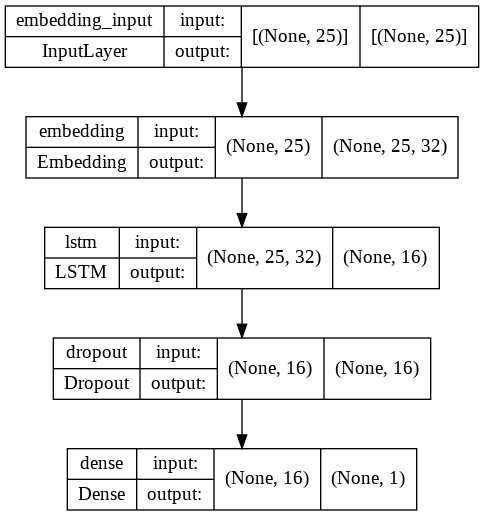

In [40]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [41]:
!pip install tensorflow-addons -q
import tensorflow_addons as tfa

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tfa.metrics.F1Score(num_classes = 2, average = 'micro', threshold = 0.5)])

In [42]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20)

Epoch 1/20
42/42 [==============================] - 5s 41ms/step - loss: 0.6913 - accuracy: 0.5471 - f1_score: 0.2117 - val_loss: 0.6890 - val_accuracy: 0.5705 - val_f1_score: 0.0000e+00
Epoch 2/20
42/42 [==============================] - 2s 46ms/step - loss: 0.6874 - accuracy: 0.5694 - f1_score: 0.0026 - val_loss: 0.6860 - val_accuracy: 0.5705 - val_f1_score: 0.0000e+00
Epoch 3/20
42/42 [==============================] - 2s 44ms/step - loss: 0.6853 - accuracy: 0.5702 - f1_score: 0.0000e+00 - val_loss: 0.6839 - val_accuracy: 0.5705 - val_f1_score: 0.0000e+00
Epoch 4/20
42/42 [==============================] - 1s 34ms/step - loss: 0.6837 - accuracy: 0.5702 - f1_score: 0.0000e+00 - val_loss: 0.6821 - val_accuracy: 0.5705 - val_f1_score: 0.0000e+00
Epoch 5/20
42/42 [==============================] - 2s 36ms/step - loss: 0.6814 - accuracy: 0.5702 - f1_score: 0.0000e+00 - val_loss: 0.6802 - val_accuracy: 0.5705 - val_f1_score: 0.0000e+00
Epoch 6/20
42/42 [==============================] - 2

In [43]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=model.history.history["loss"],
                    mode='lines',
                    name='loss'))
fig.add_trace(go.Scatter(y=model.history.history["val_loss"],
                    mode='lines',
                    name='val_loss'))
fig.show()

In [44]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'f1_score', 'val_loss', 'val_accuracy', 'val_f1_score'])

In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=model.history.history["accuracy"],
                    mode='lines',
                    name='accuracy'))
fig.add_trace(go.Scatter(y=model.history.history["val_accuracy"],
                    mode='lines',
                    name='val_accuracy'))
fig.show()

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=model.history.history["f1_score"],
                    mode='lines',
                    name='f1_score'))
fig.add_trace(go.Scatter(y=model.history.history["val_f1_score"],
                    mode='lines',
                    name='val_f1_score'))
fig.show()

# Predictions inspection

In [47]:
train, y_train

(array([[  56,  257, 4540, ...,    0,    0,    0],
        [ 646,  206, 2778, ...,    0,    0,    0],
        [   2,   53,    1, ...,    0,    0,    0],
        ...,
        [ 128,    0,    0, ...,    0,    0,    0],
        [ 229,    1,   90, ...,    0,    0,    0],
        [ 432, 1087, 1495, ...,    0,    0,    0]], dtype=int32), 2916    0
 6628    1
 261     0
 1910    0
 5481    0
        ..
 7248    0
 653     1
 1886    0
 3867    0
 3398    0
 Name: target, Length: 5328, dtype: int64)

In [48]:
df['pred'] = 'no prediction'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
model(train)

<tf.Tensor: shape=(5328, 1), dtype=float32, numpy=
array([[0.04297608],
       [0.8921666 ],
       [0.1515258 ],
       ...,
       [0.0422639 ],
       [0.0439297 ],
       [0.04189029]], dtype=float32)>

In [50]:
df.loc[y_train.index,'pred'] = model(train)
df.loc[y_val.index,'pred'] = model(val)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df

,id,keyword,text,target,text_clean,text_encoded,len_text,pred
0,1,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake allah forgive,"[3593, 411, 172, 1253, 1700]",5,0.72639
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 4, 165, 506, 5321, 5322, 1016]",7,0.899009
2,5,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident ask shelter place notify officer evacuation shelter place order expect,"[1378, 444, 1701, 322, 5323, 293, 185, 1701, 322, 359, 383]",11,0.88019
3,6,NaN,"13,000 people receive #wildfires evacuation orders in California",1,13000 people receive wildfire evacuation order california,"[2278, 9, 2279, 70, 185, 359, 38]",7,0.899794
4,7,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got send photo ruby alaska smoke wildfire pour school,"[256, 177, 124, 5324, 1933, 173, 70, 2280, 109]",9,0.409853
...,...,...,...,...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,giant crane hold bridge collapse nearby home,"[591, 936, 314, 243, 43, 485, 29]",7,0.896006
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,<mention> <mention> control wild fire california northern state troubling,"[2, 2, 557, 216, 4, 38, 131, 189, 5298]",9,0.894439
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,m194 0104 utc5 km s volcano hawaii,"[2657, 3588, 5293, 441, 7, 395, 1243]",7,0.893433
7611,10872,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,police investigate ebike collide car little portugal ebike rider suffer nonlife threaten injury,"[26, 736, 2541, 91, 48, 210, 4179, 2541, 1519, 1064, 4180, 937, 79]",13,0.889484


In [52]:
y_train.sort_index()

1       1
3       1
5       1
6       1
7       1
       ..
7607    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 5328, dtype: int64

In [53]:
(df['pred'] == 'no prediction').sum()

0

In [54]:
df['pred_binary'] = df['pred'].apply(lambda x : 1 if x > 0.5 else 0)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,keyword,text,target,text_clean,text_encoded,len_text,pred,pred_binary
0,1,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake allah forgive,"[3593, 411, 172, 1253, 1700]",5,0.72639,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 4, 165, 506, 5321, 5322, 1016]",7,0.899009,1
2,5,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident ask shelter place notify officer evacuation shelter place order expect,"[1378, 444, 1701, 322, 5323, 293, 185, 1701, 322, 359, 383]",11,0.88019,1
3,6,NaN,"13,000 people receive #wildfires evacuation orders in California",1,13000 people receive wildfire evacuation order california,"[2278, 9, 2279, 70, 185, 359, 38]",7,0.899794,1
4,7,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got send photo ruby alaska smoke wildfire pour school,"[256, 177, 124, 5324, 1933, 173, 70, 2280, 109]",9,0.409853,0
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,giant crane hold bridge collapse nearby home,"[591, 936, 314, 243, 43, 485, 29]",7,0.896006,1
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,<mention> <mention> control wild fire california northern state troubling,"[2, 2, 557, 216, 4, 38, 131, 189, 5298]",9,0.894439,1
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,m194 0104 utc5 km s volcano hawaii,"[2657, 3588, 5293, 441, 7, 395, 1243]",7,0.893433,1
7611,10872,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,police investigate ebike collide car little portugal ebike rider suffer nonlife threaten injury,"[26, 736, 2541, 91, 48, 210, 4179, 2541, 1519, 1064, 4180, 937, 79]",13,0.889484,1


In [55]:
df['good_pred'] = (df['target'] == df['pred_binary'])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,keyword,text,target,text_clean,text_encoded,len_text,pred,pred_binary,good_pred
0,1,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake allah forgive,"[3593, 411, 172, 1253, 1700]",5,0.72639,1,True
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 4, 165, 506, 5321, 5322, 1016]",7,0.899009,1,True
2,5,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident ask shelter place notify officer evacuation shelter place order expect,"[1378, 444, 1701, 322, 5323, 293, 185, 1701, 322, 359, 383]",11,0.88019,1,True
3,6,NaN,"13,000 people receive #wildfires evacuation orders in California",1,13000 people receive wildfire evacuation order california,"[2278, 9, 2279, 70, 185, 359, 38]",7,0.899794,1,True
4,7,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got send photo ruby alaska smoke wildfire pour school,"[256, 177, 124, 5324, 1933, 173, 70, 2280, 109]",9,0.409853,0,False
...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,giant crane hold bridge collapse nearby home,"[591, 936, 314, 243, 43, 485, 29]",7,0.896006,1,True
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,<mention> <mention> control wild fire california northern state troubling,"[2, 2, 557, 216, 4, 38, 131, 189, 5298]",9,0.894439,1,True
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,m194 0104 utc5 km s volcano hawaii,"[2657, 3588, 5293, 441, 7, 395, 1243]",7,0.893433,1,True
7611,10872,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,police investigate ebike collide car little portugal ebike rider suffer nonlife threaten injury,"[26, 736, 2541, 91, 48, 210, 4179, 2541, 1519, 1064, 4180, 937, 79]",13,0.889484,1,True


In [56]:
df_val = df.loc[y_val.index]
df_val

,id,keyword,text,target,text_clean,text_encoded,len_text,pred,pred_binary,good_pred
4444,6325,hostage,I went to pick up my lunch today and the bartender was holding my change hostage because he wanted my number. ??,1,pick lunch today bartender hold change hostage want number,"[181, 2165, 61, 1, 314, 188, 107, 41, 579]",9,0.044413,0,False
1869,2687,crush,@Starflame_girl yeah I have a crush on her,0,<mention> yeah crush,"[2, 519, 128]",3,0.047353,0,True
2875,4132,drought,For these Californians it's like living in Africa's Sahel desert - just finding water a daily chore. http://t.co/ySG9vsrT4g,1,californian like live africas sahel desert find water daily chore,"[4078, 3, 65, 1, 1, 3336, 72, 133, 600, 1]",10,0.841632,1,True
6928,9937,trouble,When there's trouble you know who to caaaaaall,0,s trouble know caaaaaall,"[7, 380, 30, 1]",4,0.04326,0,True
6055,8654,sinkhole,Gaping sinkhole opens up in Brooklyn New York http://t.co/0xA6FCjyec,1,gape sinkhole open brooklyn new york,"[1, 267, 456, 1014, 8, 781]",6,0.302496,0,False
...,...,...,...,...,...,...,...,...,...,...
949,1375,blown%20up,@HopefulBatgirl went down I was beaten and blown up. Then next thing I know Ra Al Ghul brought me back to life and I escaped and for a---,1,<mention> beat blow thing know ra al ghul bring life escape,"[2, 804, 78, 101, 30, 1, 1434, 1, 257, 46, 610]",11,0.042838,0,False
610,881,bioterrorism,To fight bioterrorism sir.,1,fight bioterrorism sir,"[221, 562, 1289]",3,0.892137,1,True
850,1230,blood,@Chief__CG nah young blood that cook is gone I'm cut now .haha,0,<mention> nah young blood cook m cut haha,"[2, 1430, 814, 250, 1205, 5, 687, 630]",8,0.047007,0,True
7155,10252,war%20zone,Bedroom clean bathroom clean laundry done .. Shit was looking like a war zone in here ??,0,bedroom clean bathroom clean laundry shit look like war zone,"[2026, 1533, 1812, 1533, 4379, 161, 24, 3, 57, 388]",10,0.044043,0,True


In [57]:
df.loc[6967]

id                                                                                                 9992
keyword                                                                                         tsunami
text            and i dont get waves of missing you anymore theyre more like tsunami tides in my eyesss
target                                                                                                1
text_clean                                                   wave miss anymore like tsunami tide eyesss
text_encoded                                                           [92, 123, 1139, 3, 423, 2135, 1]
len_text                                                                                              7
pred                                                                                           0.044068
pred_binary                                                                                           0
good_pred                                                       

In [58]:
df_val_tp =  df_val[(df_val['good_pred'] == True) & (df_val['pred_binary'] == 1)]
df_val_tn =  df_val[(df_val['good_pred'] == True) & (df_val['pred_binary'] == 0)]
df_val_fp =  df_val[(df_val['good_pred'] == False) & (df_val['pred_binary'] == 1)]
df_val_fn =  df_val[(df_val['good_pred'] == False) & (df_val['pred_binary'] == 0)]
precision = len(df_val_tp) / (len(df_val_tp) + len(df_val_fp))
recall = len(df_val_tp) / (len(df_val_tp) + len(df_val_fn))
f1_score = 2 * recall * precision / (recall + precision)
print("Precision : ", precision)
print("Recall : ", recall)
print("F1-score : ", f1_score)

Precision :  0.7366892545982575
Recall :  0.7757390417940877
F1-score :  0.7557100297914598


In [59]:
print("False Negatives :")
print()
df_val_fn[['text','text_clean']].sample(20, random_state = 0)

False Negatives :



,text,text_clean
929,On #ThisDayInHistory in 1862 Confederate ship blown up by crew. Read More http://t.co/IW7ELSzIfZ via @History,thisdayinhistory 1862 confederate ship blow crew read <mention>
3117,I was blow drying my hair &amp; the cable caught on fire. I let go of it as soon as I realized. Just before I could get electrocuted ??,blow dry hair amp cable catch fire let soon realize electrocute
4415,#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/xV3D9bPjHi #prebreak #best,hot funtenna hijack computer send datum sound wave black hat 2015 prebreak good
2695,Ignition Knock (Detonation) Sensor-Senso BECK/ARNLEY 158-0853 http://t.co/OdMx36WDhM http://t.co/gAHeUjRUJu,ignition knock detonation sensorsenso beckarnley 1580853
5334,Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/xRP0rTkFfJ,pandemonium aba woman deliver baby face photo
1340,forestservice : RT dhsscitech: #Firefighters run into burning buildingsÛÓwe work on #tech tÛ_ http://t.co/KybQcSvrZa) http://t.co/Ih49kyMsMp,forestservice rt dhsscitech firefighter run burn buildingsûówe work tech tû
4292,The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',prophet peace save hellfire half date charity
3272,Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets,lucas duda ghost rider nic cage version actual engulf flame badass met
949,@HopefulBatgirl went down I was beaten and blown up. Then next thing I know Ra Al Ghul brought me back to life and I escaped and for a---,<mention> beat blow thing know ra al ghul bring life escape
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,got send photo ruby alaska smoke wildfire pour school


In [60]:
print("True Negatives :")
print()
df_val_tn[['text','text_clean']].sample(20, random_state = 0)

True Negatives :



,text,text_clean
2319,Take this China get demolished and sent back to the fucking stone age,china demolish send fucking stone age
3452,Reasons @BlueWestlo has exploded on @YouTube #38745: https://t.co/Upgd2cy9il,reason <mention> explode <mention> 38745
696,Why Some Traffic Is Freezing Cold And Some Blazing Hot ÛÒ And How To Heat Up Some Of Your Traffic http://t.co/C8b6DdiQIg,traffic freeze cold blaze hot ûò heat traffic
4806,Moved on to 'Bang Bang Rock and Roll' by @Art_Brut_ . It's been too long since I've played this one loud. ART BRUT TOP OF THE POPS.,bang bang rock roll <mention> long ve play loud art brut pop
3930,2pcs 18W CREE Led Work Light Offroad Lamp Car Truck Boat Mining 4WD FLOOD BEAM - Full reaÛ_ http://t.co/O1SMUh2unn http://t.co/xqj6WgiuQH,2pc 18w cree lead work light offroad lamp car truck boat mining 4wd flood beam reaû
4957,@JustinTrudeau \n\nMost respected in world\nBest job recovery G7 and G20\nBest led during 2008 world meltdown\n\nWhat exactly have you done ??,<mention> respected worldb job recovery g7 g20best lead 2008 world meltdownwhat exactly
5326,@BlizzHeroes Would love to see a Diablo map themed after places like Westmarch or Mt. Arreat or Pandemonium.,<mention> love diablo map theme place like westmarch mt arreat pandemonium
908,@MariaSherwood2 @JohnJCampbell Mega bloody marvellous,<mention> <mention> mega bloody marvellous
6773,@Toocodtodd Hey @wyattb23 let's challenge then to a tornado tag tlc match. Winner take all.,<mention> hey <mention> let challenge tornado tag tlc match winner
3643,There have been zero spider bite-related fatalities in Australia since 1979.,zero spider biterelate fatality australia 1979


In [61]:
print("False Positives :")
print()
df_val_fp[['text','text_clean']].sample(20, random_state = 0)

False Positives :



,text,text_clean
1992,@writebothfists It got pretty windy here too... But no damage.,<mention> pretty windy damage
1790,am boy @Crash_______ https://t.co/f5Ylp7pfN7,boy <mention>
3855,New Giant Flames (Giant Manly Brown) info/order sms:087809233445 pin:2327564d http://t.co/T1mBw0ia3o http://t.co/CLfa0PY5Lm,new giant flame giant manly brown infoorder sms087809233445 pin2327564d
397,Mourning notices for stabbing arson victims stir Û÷politics of griefÛª in Israel: Posters for Shira Banki and A... http://t.co/3GZ5zQQTHe,mourning notice stab arson victim stir ûpolitic griefûª israel poster shira banki
5542,Who Else Wants Documents Radiation Emergency Procedures 06 24 09 #radiation #emergency #procedures #06 #24 #09 http://t.co/HxwFBpP1b3,want document radiation emergency procedure 06 24 09 radiation emergency procedure 06 24 09
200,HAPPENING NOW - HATZOLAH EMS AMBULANCE RESPONDING WITH DUAL SIRENS ANDÛ_ https://t.co/SeK6MQ6NJF,happen hatzolah ems ambulance respond dual siren andû
584,FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday,fedex long transport bioterror germ wake anthrax lab mishap <mention>
7068,A look at state actions a year after Ferguson's upheaval http://t.co/TBQsqtmqV4,look state action year ferguson upheaval
2821,@lizhphoto When I have so much shit going on in my head I'd rather talk about it than have an outburst.. Displaced aggression SUX!!,<mention> shit head d talk outburst displace aggression sux
880,Shed innocent blood of their sons and daughters and the land was polluted Psalms 106:38 Help stop the sin of abortion.,shed innocent blood son daughter land polluted psalm 10638 help stop sin abortion


In [62]:
print("True Positives :")
print()
df_val_tp[['text','text_clean']].sample(20, random_state = 0)

True Positives :



,text,text_clean
6051,10News ? Water main break disrupts trolley service http://t.co/pAug7a68i0,10news water main break disrupt trolley service
3029,Contruction upgrading ferries to earthquake standards in Vashon Mukilteo - Q13 FOX http://t.co/E981DgSkab #EarthquakeNews,contruction upgrade ferry earthquake standard vashon mukilteo q13 fox earthquakenews
4483,No #news of #hostages in #Libya\n\nhttp://t.co/k9FBtcCU58\n\n#India #terrorism #Africa #AP #TS #NRI #News #TRS #TDP #BJP http://t.co/XYj0rPsAI2,news hostage libya india terrorism africa ap ts nri news trs tdp bjp
2455,CHICAGO FD\nSTILL &amp; BOX ALARM/EMS PLAN I \n 61ST &amp; CALUMET FOR THE EL TRAIN DERAILMENT\nCINS/TG,chicago fdstill amp box alarmem plan 61st amp calumet el train derailmentcinstg
3551,'Food crematoria' provoke outrage amid crisis famine memories... http://t.co/REsxAvgpyJ,food crematoria provoke outrage amid crisis famine memory
6356,Investigators rule catastrophic structural failure resulted in 2014 ... http://t.co/QU1IUg3E9r,investigator rule catastrophic structural failure result 2014
4066,Forest fires could delay @AbbyAirshow but officials say it could be a good thing http://t.co/Vxjcx8uKMd,forest fire delay <mention> official good thing
3885,Today (August 6th) is the 70th anniversary of A-Bomb 'Little Boy' been dropped on Hiroshima.70000 killed outright as the city was flattened,today august 6th 70th anniversary abomb little boy drop hiroshima70000 kill outright city flatten
5734,VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterranean after a boat carryi...,video pick body water rescuer search migrant mediterranean boat carryi
7109,POV footage captures violent landing from inside plane during storm http://t.co/kxewlHH7Uw,pov footage capture violent landing inside plane storm
